In [ ]:
#| hide
from paramfittorchdemo.training import *

# paramfittorchdemo

> How to use pytorch to fit parameters of differential equations

This file will become your README and also the index of your documentation.

## Install

```sh
pip install paramfittorchdemo
```

## How to use

Using the integration routines in the library torchdiffeq we can integrate differential equations using torch modules as the base
class for describing the systems. This allows for gradients to be computed with respect to the model parameters. This can be combined with the local optimization schemes used to train neural networks to give a powerful framework for fitting differential equation models found in the scientific literature. 

In this package I provide a few example systems and parameter fitting routines for fitting the parameters. 

The below code demonstrates how the van der Pol oscillator system defined as `torch.nn.module` can be integrated against inside of pytorch. 



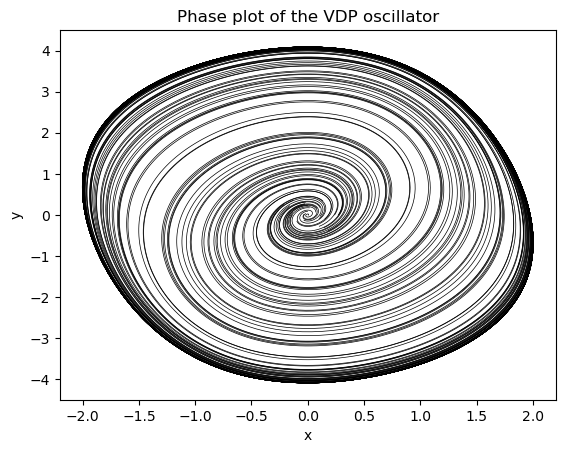

In [ ]:
import torch 
from torchdiffeq import odeint_adjoint as odeint
import matplotlib.pyplot as plt
vdp_model = VDP(mu=0.5)
ts = torch.linspace(0,30.0,1000)
# Create a batch of initial conditions 
batch_size = 30
initial_conditions = torch.tensor([0.01, 0.01]) + 0.2*torch.randn((batch_size,2))
sol = odeint(vdp_model, initial_conditions, ts, method='dopri5').detach().numpy()


# Check the solution
plt.plot(sol[:,:,0], sol[:,:,1], color='black', lw=0.5);
plt.title("Phase plot of the VDP oscillator");
plt.xlabel("x");
plt.ylabel("y");

The automatic batching dimensions means we can easily integrate a collection of initial conditions at the same time using these routines as well. The above shows the phase plane plot of the VDP oscillator for 30 random initial conditions. 